In [1]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade geopy
!pip install --upgrade plotly

     |████████████████████████████████| 1.0MB 32.5MB/s 
     |████████████████████████████████| 6.5MB 38.0MB/s 
     |████████████████████████████████| 15.3MB 232kB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
     |████████████████████████████████| 225kB 26.2MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=8dfe38fba306d7a0700c2cf6b81b35ef7ebf5c39bcc01b6654fd08d71def5054
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.7/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.7/dist-packages (1.1.0)
     |████████████████████████████████| 112kB 30.2MB/s 
  Found existing installation: geopy 1.17.0
    Uninstalling geopy-1.17.0:
      Succes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
import plotly.express as px

In [3]:
dfLabels = pd.read_csv('/content/drive/MyDrive/FIUBA/Organización de datos/orga-2021/PT1/train_labels.csv')

In [4]:
dfLabels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [5]:
dfValues = pd.read_csv('/content/drive/MyDrive/FIUBA/Organización de datos/orga-2021/PT1/train_values.csv')

In [6]:
dfValues

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#agrego la columna damage_grade y la renombro
dfTerremoto = dfValues
dfTerremoto['damage_grade'] = dfLabels['damage_grade'] #esposible por que estan ordenados y mantienen el orden
dfTerremoto

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [8]:
dfTerremoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

sospecho que los que estan en damage_grade 3 son las has_superstructure_adobe_mud has_superstructure_mud_mortar_stone 

In [9]:
#voy a dividir los años en tres categorias
df = dfTerremoto['age']
print(max(df.to_list()))

995


In [10]:
df = dfTerremoto['age']
print(min(df.to_list()))

0


In [11]:
a = max(df.to_list()) / 3
a

331.6666666666667

propidades antiguas 0 a 332, propidades media antuas 333 a 663, propiedades nuevas 664 a 995

In [12]:
print(dfTerremoto.columns.to_list())

['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police

In [13]:
#quiero ver si las has_superstructure_rc_engineered y has_superstructure_rc_non_engineered tienen relación con alguna de las otras
dfTerremotoSuper = dfTerremoto.loc[lambda dfTerremoto: (dfTerremoto['has_superstructure_rc_engineered'] == 1)]
dfTerremotoSuper

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
53,288541,10,661,8482,1,0,12,3,t,i,x,v,j,t,d,0,0,0,0,0,1,0,0,0,1,0,v,0,0,0,0,0,0,0,0,0,0,0,0,1
71,708530,26,39,10795,1,0,17,3,t,i,x,v,j,s,d,0,0,0,0,0,0,0,0,0,1,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
108,635262,26,39,11246,1,0,37,3,t,r,x,v,j,s,d,0,0,0,0,0,0,0,0,0,1,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
248,920565,6,1350,5830,2,0,20,7,t,i,x,x,s,s,d,0,0,0,0,0,1,0,0,0,1,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
311,799072,7,258,12275,3,0,10,10,t,i,x,v,s,t,d,0,0,0,0,0,0,0,0,0,1,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260213,539650,6,673,2803,2,0,13,7,t,i,x,v,s,s,d,0,0,0,0,0,1,0,0,0,1,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
260271,161297,0,885,11635,2,15,9,6,t,i,x,v,s,t,d,0,0,0,0,0,0,0,0,0,1,0,v,0,0,0,0,0,0,0,0,0,0,0,0,1
260458,177964,26,39,633,1,0,15,3,t,i,x,x,j,s,d,0,0,0,0,0,0,0,0,0,1,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
260530,344478,6,1253,4063,3,15,7,9,t,i,x,v,s,s,d,0,0,0,0,0,0,0,0,0,1,0,v,0,1,0,1,0,0,0,0,0,0,0,0,1


In [14]:
dfTerremotoSuper = dfTerremoto.loc[lambda dfTerremoto: (dfTerremoto['has_superstructure_rc_non_engineered'] == 1)]
dfTerremotoSuper

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
45,440102,7,157,5265,1,5,11,3,n,i,x,v,j,t,d,0,0,0,0,0,0,0,0,1,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,1
99,697129,13,569,9184,3,0,12,6,t,r,q,f,x,s,d,0,1,0,0,0,0,0,0,1,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
114,533100,27,422,9497,2,0,14,7,t,i,x,v,s,t,u,0,0,0,0,0,0,0,0,1,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0,1
140,958524,20,953,5878,2,10,14,6,t,w,q,f,x,o,d,0,0,0,0,0,0,1,1,1,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,2
208,1025864,25,745,2704,2,25,4,5,t,r,n,f,x,s,d,0,1,1,0,0,0,1,0,1,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260498,244286,7,430,12378,2,0,7,7,t,u,x,v,s,t,d,0,0,0,1,0,0,0,0,1,0,0,v,0,1,0,1,0,0,0,0,0,0,0,0,2
260510,278052,27,269,328,2,20,8,5,t,r,n,f,q,s,d,1,1,0,0,0,0,1,1,1,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260520,353176,26,39,9133,1,10,17,3,t,i,x,v,j,s,d,0,0,0,0,0,0,0,0,1,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
260550,534789,6,673,2803,3,10,12,7,t,r,n,f,x,s,d,0,1,0,0,1,0,0,0,1,0,0,v,2,0,0,0,0,0,0,0,0,0,0,0,2


In [15]:
dfAgeConstruc = dfTerremoto[['building_id','age','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other','damage_grade']]

In [16]:
conditions = [
    ((dfAgeConstruc['has_superstructure_adobe_mud']==1) | \
     (dfAgeConstruc['has_superstructure_mud_mortar_stone']==1) | \
     (dfAgeConstruc['has_superstructure_mud_mortar_stone']==1) | \
     (dfAgeConstruc['has_superstructure_mud_mortar_brick']==1)),
    (dfAgeConstruc['has_superstructure_stone_flag']==1),
    ((dfAgeConstruc['has_superstructure_cement_mortar_stone']==1) | \
     (dfAgeConstruc['has_superstructure_cement_mortar_brick']==1)), \
     ((dfAgeConstruc['has_superstructure_timber']==1) | \
      (dfAgeConstruc['has_superstructure_bamboo']==1)), \
      (dfAgeConstruc['has_superstructure_other']==1)]
choices = ['barro', 'piedra', 'cemento','madera','otros']

new_col = np.select(conditions, choices, default='no_clasificados')
dfAgeConstruc.insert(loc=13, column='material_de_construccion', value=new_col)
dfAgeConstruc

,building_id,age,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,material_de_construccion,damage_grade
0,802906,30,1,1,0,0,0,0,0,0,0,0,0,barro,3
1,28830,10,0,1,0,0,0,0,0,0,0,0,0,barro,2
2,94947,10,0,1,0,0,0,0,0,0,0,0,0,barro,3
3,590882,10,0,1,0,0,0,0,1,1,0,0,0,barro,2
4,201944,30,1,0,0,0,0,0,0,0,0,0,0,barro,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,55,0,1,0,0,0,0,0,0,0,0,0,barro,2
260597,669485,0,0,1,0,0,0,0,0,0,0,0,0,barro,3
260598,602512,55,0,1,0,0,0,0,0,0,0,0,0,barro,3
260599,151409,10,0,0,0,0,0,1,0,0,0,0,0,cemento,2


In [17]:
dfAgeConstruc = dfAgeConstruc[['building_id','age','material_de_construccion','damage_grade']]
dfAgeConstruc

,building_id,age,material_de_construccion,damage_grade
0,802906,30,barro,3
1,28830,10,barro,2
2,94947,10,barro,3
3,590882,10,barro,2
4,201944,30,barro,3
...,...,...,...,...
260596,688636,55,barro,2
260597,669485,0,barro,3
260598,602512,55,barro,3
260599,151409,10,cemento,2


In [18]:
dfAgeConstruc['cantidad'] = 1
dfAgeConstrucB = dfAgeConstruc[['material_de_construccion','cantidad']]
dfAgeConstrucB =dfAgeConstrucB.groupby('material_de_construccion').sum()
dfAgeConstrucB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cantidad
material_de_construccion,
barro,222380
cemento,18043
madera,10336
no_clasificados,6819
otros,349
piedra,2674


In [19]:
dfAgeConstruc

,building_id,age,material_de_construccion,damage_grade,cantidad
0,802906,30,barro,3,1
1,28830,10,barro,2,1
2,94947,10,barro,3,1
3,590882,10,barro,2,1
4,201944,30,barro,3,1
...,...,...,...,...,...
260596,688636,55,barro,2,1
260597,669485,0,barro,3,1
260598,602512,55,barro,3,1
260599,151409,10,cemento,2,1


propidades antiguas 0 a 18(no hay ninguno en el rango de 19 a 60 por en de voy a ampliar este rango hasta 190), propidades media antuas 333 a 663, propiedades nuevas 61 a 995

In [20]:
dfAntiG = dfAgeConstruc.loc[:,('damage_grade','age','cantidad','material_de_construccion')]
dfAntiG.loc[(dfAntiG.age < 19),'material_de_construccion'] = 'antiguo'
dfAntiG.loc[((dfAntiG.age > 18) & (dfAntiG.age < 61)),'material_de_construccion'] = 'semi-antiguo'
dfAntiG.loc[(dfAntiG.age > 60),'material_de_construccion'] = 'nuevo'
dfAntiG.columns = ['damage_grade','age','cantidad','antiguedad']
dfAntiG

,damage_grade,age,cantidad,antiguedad
0,3,30,1,semi-antiguo
1,2,10,1,antiguo
2,3,10,1,antiguo
3,2,10,1,antiguo
4,3,30,1,semi-antiguo
...,...,...,...,...
260596,2,55,1,semi-antiguo
260597,3,0,1,antiguo
260598,3,55,1,semi-antiguo
260599,2,10,1,antiguo


In [21]:
dfConcat = dfAntiG['antiguedad']
dfAntiguedadDanio = pd.concat([dfAgeConstruc, dfConcat],axis=1)
dfAntiguedadDanio

,building_id,age,material_de_construccion,damage_grade,cantidad,antiguedad
0,802906,30,barro,3,1,semi-antiguo
1,28830,10,barro,2,1,antiguo
2,94947,10,barro,3,1,antiguo
3,590882,10,barro,2,1,antiguo
4,201944,30,barro,3,1,semi-antiguo
...,...,...,...,...,...,...
260596,688636,55,barro,2,1,semi-antiguo
260597,669485,0,barro,3,1,antiguo
260598,602512,55,barro,3,1,semi-antiguo
260599,151409,10,cemento,2,1,antiguo


# Analisis tipo de construccion y grado de antiguedad
##Aclaracion por una comprención equivocada llame a los nuevos antiguos y viciversa (1)

In [22]:
#total antiguedades
dfTotalAntiGuedad = dfAntiguedadDanio[['antiguedad','cantidad']]
dfAntiGuedad = dfTotalAntiGuedad.groupby('antiguedad').count()
dfAntiGuedad

,cantidad
antiguedad,
antiguo,134644
nuevo,12499
semi-antiguo,113458


In [23]:
#antiguos nuevos con barro
dfAge = dfAntiG.loc[dfAntiguedadDanio['material_de_construccion'] == 'barro',('age','cantidad','antiguedad')]
dfAgeC = dfAge[['antiguedad','cantidad']]
dfAgeC = dfAgeC.groupby('antiguedad').count()
dfAgeC

,cantidad
antiguedad,
antiguo,103140
nuevo,12071
semi-antiguo,107169


In [24]:
#antiguos nuevos con cemento
dfAge = dfAntiguedadDanio.loc[dfAntiguedadDanio['material_de_construccion'] == 'cemento',('age','cantidad','antiguedad')]
dfAgeC = dfAge[['antiguedad','cantidad']]
dfAgeC = dfAgeC.groupby('antiguedad').count()
dfAgeC

,cantidad
antiguedad,
antiguo,14910
nuevo,149
semi-antiguo,2984


In [25]:
#antiguos nuevos con madera
dfAge = dfAntiguedadDanio.loc[dfAntiguedadDanio['material_de_construccion'] == 'madera',('age','cantidad','antiguedad')]
dfAgeC = dfAge[['antiguedad','cantidad']]
dfAgeC = dfAgeC.groupby('antiguedad').count()
dfAgeC

,cantidad
antiguedad,
antiguo,8689
nuevo,41
semi-antiguo,1606


In [26]:
#antiguos nuevos con no_clasificados
dfAge = dfAntiguedadDanio.loc[dfAntiguedadDanio['material_de_construccion'] == 'no_clasificados',('age','cantidad','antiguedad')]
dfAgeC = dfAge[['antiguedad','cantidad']]
dfAgeC = dfAgeC.groupby('antiguedad').count()
dfAgeC

,cantidad
antiguedad,
antiguo,6155
nuevo,21
semi-antiguo,643


In [27]:
#antiguos nuevos con otros
dfAge = dfAntiguedadDanio.loc[dfAntiguedadDanio['material_de_construccion'] == 'otros',('age','cantidad','antiguedad')]
dfAgeC = dfAge[['antiguedad','cantidad']]
dfAgeC = dfAgeC.groupby('antiguedad').count()
dfAgeC

,cantidad
antiguedad,
antiguo,285
nuevo,1
semi-antiguo,63


In [28]:
#antiguos nuevos con piedra
dfAge = dfAntiguedadDanio.loc[dfAntiguedadDanio['material_de_construccion'] == 'piedra',('age','cantidad','antiguedad')]
dfAgeC = dfAge[['antiguedad','cantidad']]
dfAgeC = dfAgeC.groupby('antiguedad').count()
dfAgeC

,cantidad
antiguedad,
antiguo,1465
nuevo,216
semi-antiguo,993


#Analisis de la destruccion sufrida por los ditintos tipos de contrucción

In [29]:
#destruccion
dfDesTotal = dfAgeConstruc.loc[:,('damage_grade','cantidad','material_de_construccion')]
dfDesTotal.loc[(dfDesTotal.damage_grade == 3),'material_de_construccion'] = 'destruccion_total'
dfDesTotal.loc[(dfDesTotal.damage_grade == 2),'material_de_construccion'] = 'destruccion_parcial'
dfDesTotal.loc[(dfDesTotal.damage_grade == 1),'material_de_construccion'] = 'daño_leve'
dfDesTotal.columns = ['damage_grade','cantidad','grado_de_destruccion']
dfDesTotal

,damage_grade,cantidad,grado_de_destruccion
0,3,1,destruccion_total
1,2,1,destruccion_parcial
2,3,1,destruccion_total
3,2,1,destruccion_parcial
4,3,1,destruccion_total
...,...,...,...
260596,2,1,destruccion_parcial
260597,3,1,destruccion_total
260598,3,1,destruccion_total
260599,2,1,destruccion_parcial


In [30]:
dfConcat = dfDesTotal['grado_de_destruccion']
dfDestruc = pd.concat([dfAgeConstruc, dfConcat],axis=1)
dfDestruc

,building_id,age,material_de_construccion,damage_grade,cantidad,grado_de_destruccion
0,802906,30,barro,3,1,destruccion_total
1,28830,10,barro,2,1,destruccion_parcial
2,94947,10,barro,3,1,destruccion_total
3,590882,10,barro,2,1,destruccion_parcial
4,201944,30,barro,3,1,destruccion_total
...,...,...,...,...,...,...
260596,688636,55,barro,2,1,destruccion_parcial
260597,669485,0,barro,3,1,destruccion_total
260598,602512,55,barro,3,1,destruccion_total
260599,151409,10,cemento,2,1,destruccion_parcial


In [31]:
#total destruccion
dfTotalDesc = dfDestruc[['grado_de_destruccion','cantidad']]
dftotalD = dfTotalDesc.groupby('grado_de_destruccion').count()
dftotalD

,cantidad
grado_de_destruccion,
daño_leve,25124
destruccion_parcial,148259
destruccion_total,87218


busco la cantidad de destruidos

In [32]:
#destridos barro
dfAge = dfDestruc.loc[dfDestruc['material_de_construccion'] == 'barro',('damage_grade','cantidad','grado_de_destruccion')]
dfAge = dfAge[['grado_de_destruccion','cantidad']]
dfAge = dfAge.groupby('grado_de_destruccion').count()
dfAge

,cantidad
grado_de_destruccion,
daño_leve,9628
destruccion_parcial,128952
destruccion_total,83800


In [33]:
#destridos cemento
dfAge = dfDestruc.loc[dfDestruc['material_de_construccion'] == 'cemento',('damage_grade','cantidad','grado_de_destruccion')]
dfAge = dfAge[['grado_de_destruccion','cantidad']]
dfAge = dfAge.groupby('grado_de_destruccion').count()
dfAge

,cantidad
grado_de_destruccion,
daño_leve,7167
destruccion_parcial,9963
destruccion_total,913


In [34]:
#destridos madera
dfAge = dfDestruc.loc[dfDestruc['material_de_construccion'] == 'madera',('damage_grade','cantidad','grado_de_destruccion')]
dfAge = dfAge[['grado_de_destruccion','cantidad']]
dfAge = dfAge.groupby('grado_de_destruccion').count()
dfAge

,cantidad
grado_de_destruccion,
daño_leve,3964
destruccion_parcial,5437
destruccion_total,935


In [35]:
#destridos no_clasificados
dfAge = dfDestruc.loc[dfDestruc['material_de_construccion'] == 'no_clasificados',('damage_grade','cantidad','grado_de_destruccion')]
dfAge = dfAge[['grado_de_destruccion','cantidad']]
dfAge = dfAge.groupby('grado_de_destruccion').count()
dfAge

,cantidad
grado_de_destruccion,
daño_leve,4132
destruccion_parcial,2536
destruccion_total,151


In [36]:
#destridos otros
dfAge = dfDestruc.loc[dfDestruc['material_de_construccion'] == 'otros',('damage_grade','cantidad','grado_de_destruccion')]
dfAge = dfAge[['grado_de_destruccion','cantidad']]
dfAge = dfAge.groupby('grado_de_destruccion').count()
dfAge

,cantidad
grado_de_destruccion,
daño_leve,181
destruccion_parcial,115
destruccion_total,53


In [37]:
#destridos piedra
dfAge = dfDestruc.loc[dfDestruc['material_de_construccion'] == 'piedra',('damage_grade','cantidad','grado_de_destruccion')]
dfAge = dfAge[['grado_de_destruccion','cantidad']]
dfAge = dfAge.groupby('grado_de_destruccion').count()
dfAge

,cantidad
grado_de_destruccion,
daño_leve,52
destruccion_parcial,1256
destruccion_total,1366


#analissi por grado de antiguedad

In [38]:
dfConcat = dfAntiguedadDanio['antiguedad']
dfAntiguedadyDanio = pd.concat([dfDestruc, dfConcat],axis=1)
dfAntiguedadyDanio

,building_id,age,material_de_construccion,damage_grade,cantidad,grado_de_destruccion,antiguedad
0,802906,30,barro,3,1,destruccion_total,semi-antiguo
1,28830,10,barro,2,1,destruccion_parcial,antiguo
2,94947,10,barro,3,1,destruccion_total,antiguo
3,590882,10,barro,2,1,destruccion_parcial,antiguo
4,201944,30,barro,3,1,destruccion_total,semi-antiguo
...,...,...,...,...,...,...,...
260596,688636,55,barro,2,1,destruccion_parcial,semi-antiguo
260597,669485,0,barro,3,1,destruccion_total,antiguo
260598,602512,55,barro,3,1,destruccion_total,semi-antiguo
260599,151409,10,cemento,2,1,destruccion_parcial,antiguo


In [39]:
#grado de destruccion de los antiguos
dfAntiguo = dfAntiguedadyDanio.loc[dfAntiguedadyDanio['antiguedad'] == 'antiguo',('cantidad','grado_de_destruccion')]
dfAntiguo = dfAntiguo.groupby('grado_de_destruccion').count()
dfAntiguo

,cantidad
grado_de_destruccion,
daño_leve,20041
destruccion_parcial,74888
destruccion_total,39715


In [40]:
#grado de destruccion de los semi-antiguo
dfSemiAntiguo = dfAntiguedadyDanio.loc[dfAntiguedadyDanio['antiguedad'] == 'semi-antiguo',('cantidad','grado_de_destruccion')]
dfSemiAntiguo = dfSemiAntiguo.groupby('grado_de_destruccion').count()
dfSemiAntiguo

,cantidad
grado_de_destruccion,
daño_leve,4771
destruccion_parcial,65742
destruccion_total,42945


In [41]:
#grado de destruccion de los nuevos
dfNuevos = dfAntiguedadyDanio.loc[dfAntiguedadyDanio['antiguedad'] == 'nuevo',('cantidad','grado_de_destruccion')]
dfNuevos = dfNuevos.groupby('grado_de_destruccion').count()
dfNuevos

,cantidad
grado_de_destruccion,
daño_leve,312
destruccion_parcial,7629
destruccion_total,4558


In [47]:
url = 'https://github.com/DatosOrga2021/orga_datos_1c_2021/raw/main/tp1/OrgTP1Elvis/terremoto.csv'
dfMatrialAntiguedad = pd.read_csv(url)
dfMatrialAntiguedad

,Source,Dest,Value
0,barro,nuevos,103140
1,barro,semi-antiguos,107169
2,barro,antiguos,12071
3,cemento,nuevos,14910
4,cemento,semi-antiguos,2984
5,cemento,antiguos,149
6,madera,nuevos,8689
7,madera,semi-antiguos,1606
8,madera,antiguos,41
9,no_clasificado,nuevos,6155


Con los datos anteriores y una herramienta externa se genera la siguiente imagen
![picture](https://github.com/DatosOrga2021/orga_datos_1c_2021/raw/main/tp1/OrgTP1Elvis/imagenes/TP-orga.png)

analisis de la antiguedad grado de destruccion y cantidad de personas que viven en la propiedad

In [43]:
dfTerremoto

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [44]:
dfAntGradePerso = dfTerremoto[['count_families','age','damage_grade']]
dfAntGradePerso

,count_families,age,damage_grade
0,1,30,3
1,1,10,2
2,1,10,3
3,1,10,2
4,1,30,3
...,...,...,...
260596,1,55,2
260597,1,0,3
260598,1,55,3
260599,1,10,2


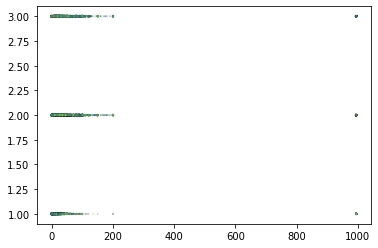

In [45]:
import numpy as np
import matplotlib.pyplot as plt
N = 260601
colors = np.random.rand(N)
plt.scatter(dfAntGradePerso.age, dfAntGradePerso.damage_grade, s=dfAntGradePerso.count_families, c=colors, alpha=0.2)
plt.show()